# Exemplar: Discover what is in your dataset

## Step 1: Imports

In [19]:
# Import libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [20]:
# Load data from the csv file into a DataFrame and save in a variable
companies = pd.read_csv("companies.csv")

In [21]:
# Display the first 10 rows of the data
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [22]:
# How large the dataset is
companies.size

10740

In [23]:
# Shape of the dataset
companies.shape

(1074, 10)

In [24]:
# Get information
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [25]:
### Get descriptive statistics
companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [78]:
# Step 1. Use pd.to_datetime() to convert Date Joined column to datetime 
# Step 2. Update the column with the converted values
companies["Date Joined"] = pd.to_datetime(companies["Date Joined"], format='%m-%d-%y')


In [79]:
# Use .info() to confirm that the update actually took place
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int32         
 8   Funding           1062 non-null   float64       
 9   Select Investors  1073 non-null   object        
 10  Year Joined       1074 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(7)
memory usage: 84.0+ KB


In [80]:
# Step 1: Use .dt.year to extract year component from Date Joined column
# Step 2: Add the result as a new column named Year Joined to the DataFrame
companies["Year Joined"] = companies["Date Joined"].dt.year

In [81]:
# Use .head() to confirm that the new column did get added
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2017,8.0,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2012,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2018,2.0,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2014,2.0,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2011,4.0,"Institutional Venture Partners, Sequoia Capita...",2011


In [39]:
# Sample the data
companies_sample = companies.sample(n = 50, random_state = 42)

In [40]:
# Prepare data for plotting
# Create new `years_till_unicorn` column 
companies_sample["years_till_unicorn"] = companies_sample["Year Joined"] - companies_sample["Year Founded"]

# Group the data by `Industry`. For each industry, get the max value in the `years_till_unicorn` column.
grouped = (companies_sample[["Industry", "years_till_unicorn"]]
           .groupby("Industry")
           .max()
           .sort_values(by="years_till_unicorn")
          )
grouped

,years_till_unicorn
Industry,
Consumer & retail,1
Auto & transportation,2
Artificial intelligence,5
Data management & analytics,8
Mobile & telecommunications,9
"Supply chain, logistics, & delivery",12
Internet software & services,13
Other,15
E-commerce & direct-to-consumer,18


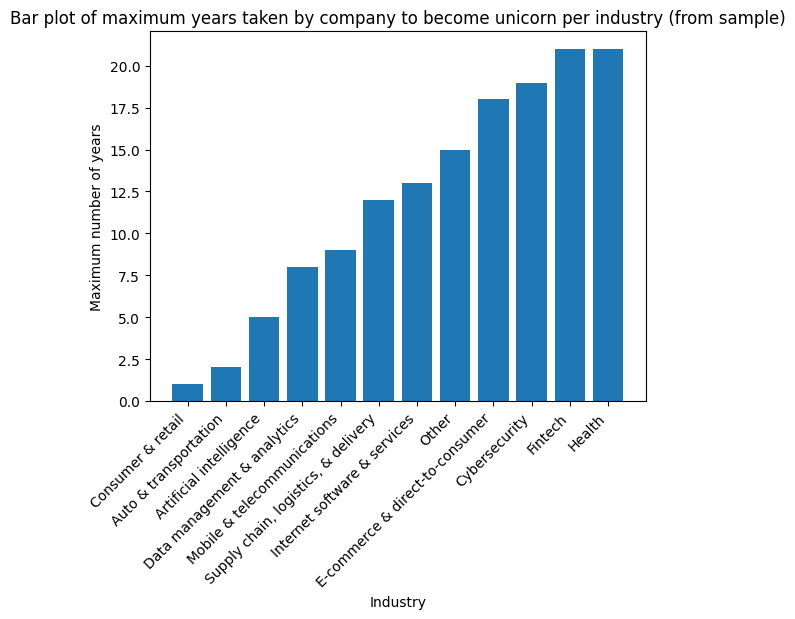

In [41]:
# Create bar plot
# with Industry column as the categories of the bars
# and the difference in years between Year Joined column and Year Founded column as the heights of the bars
plt.bar(grouped.index, grouped["years_till_unicorn"])

# Set title
plt.title("Bar plot of maximum years taken by company to become unicorn per industry (from sample)")

# Set x-axis label
plt.xlabel("Industry")

# Set y-axis label
plt.ylabel("Maximum number of years")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text  
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot
plt.show()

In [42]:
# Create a column representing company valuation as numeric data

# Create new column
companies_sample['valuation_billions'] = companies_sample['Valuation']
# Remove the '$' from each value
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('$', '')
# Remove the 'B' from each value
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('B', '')
# Convert column to type int
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].astype('int')
companies_sample.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,years_till_unicorn,valuation_billions
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5,2
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8,2
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7,3
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9,2
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5,3


In [43]:
# Prepare data for modeling
grouped = (companies_sample[["Industry", "valuation_billions"]]
           .groupby("Industry")
           .max()
           .sort_values(by="valuation_billions")
          )
grouped

,valuation_billions
Industry,
Auto & transportation,1
Consumer & retail,1
Other,2
"Supply chain, logistics, & delivery",2
Cybersecurity,3
Health,3
Data management & analytics,4
E-commerce & direct-to-consumer,4
Internet software & services,5


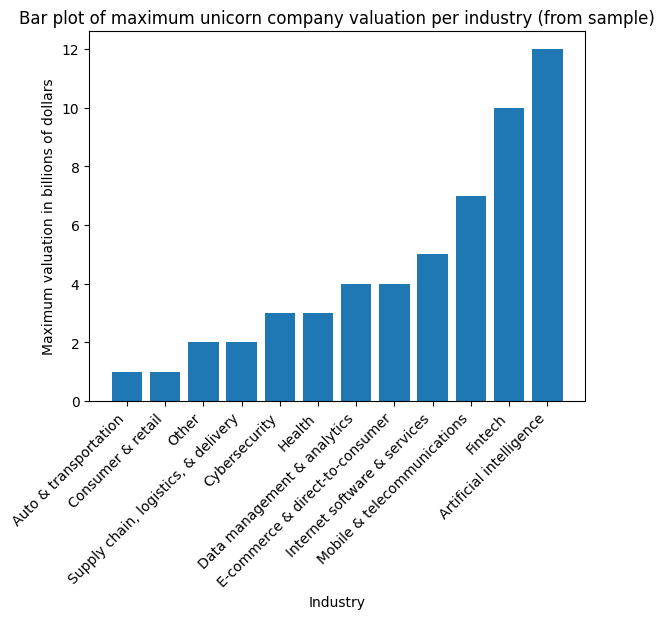

In [44]:
# Create bar plot
# with Industry column as the categories of the bars
# and new valuation column as the heights of the bars
plt.bar(grouped.index, grouped["valuation_billions"])

# Set title
plt.title("Bar plot of maximum unicorn company valuation per industry (from sample)")

# Set x-axis label
plt.xlabel("Industry")

# Set y-axis label
plt.ylabel("Maximum valuation in billions of dollars")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text  
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot
plt.show()

Distribution by industry sector:
 Industry
Fintech                                224
Internet software & services           205
E-commerce & direct-to-consumer        111
Health                                  74
Artificial intelligence                 73
Other                                   58
Supply chain, logistics, & delivery     57
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                34
Auto & transportation                   31
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Artificial Intelligence                 11
Name: count, dtype: int64


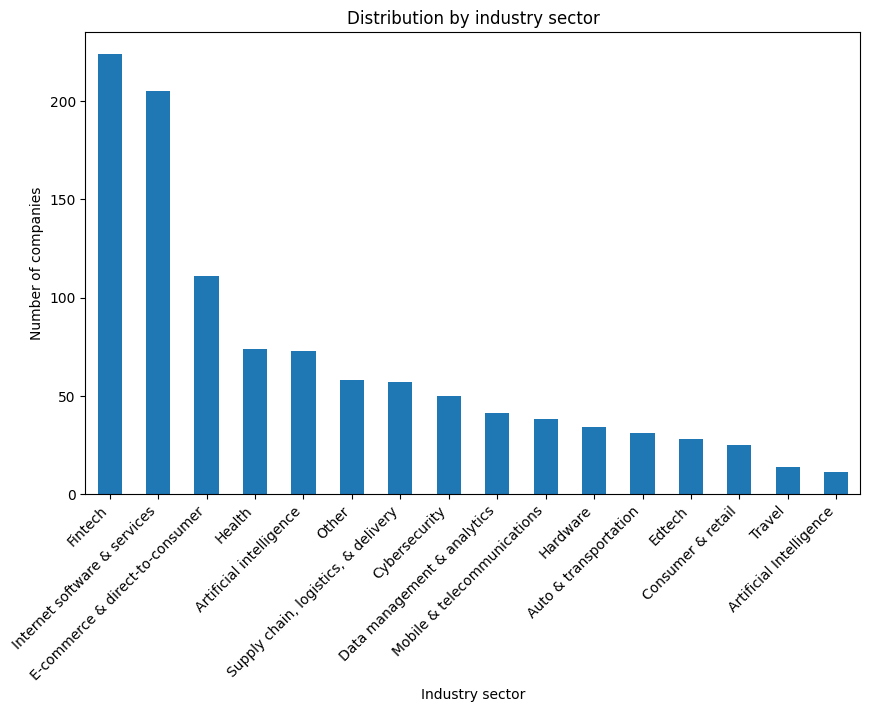

In [72]:
# Analysis of industry distribution
industry_distribution = companies['Industry'].value_counts()
print("Distribution by industry sector:\n", industry_distribution)

# Creating a bar chart for industry distribution
industry_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution by industry sector')
plt.xlabel('Industry sector')
plt.ylabel('Number of companies')
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

Distribution by city:
 City
San Francisco    152
New York         103
Beijing           63
Shanghai          44
London            34
                ... 
Santa Barbara      1
Altrincham         1
Northbrook         1
Cincinnati         1
Milpitas           1
Name: count, Length: 256, dtype: int64

Distribution by country/region:
 Country/Region
United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Hong Kong                 6
Mexico                    6
Indonesia                 6
Netherlands               6
Sweden                    6
Switzerland               5
Japan                     5
Ireland                   5
Finland                   4
Norway                    4
United Arab Emirates      3
Turkey   

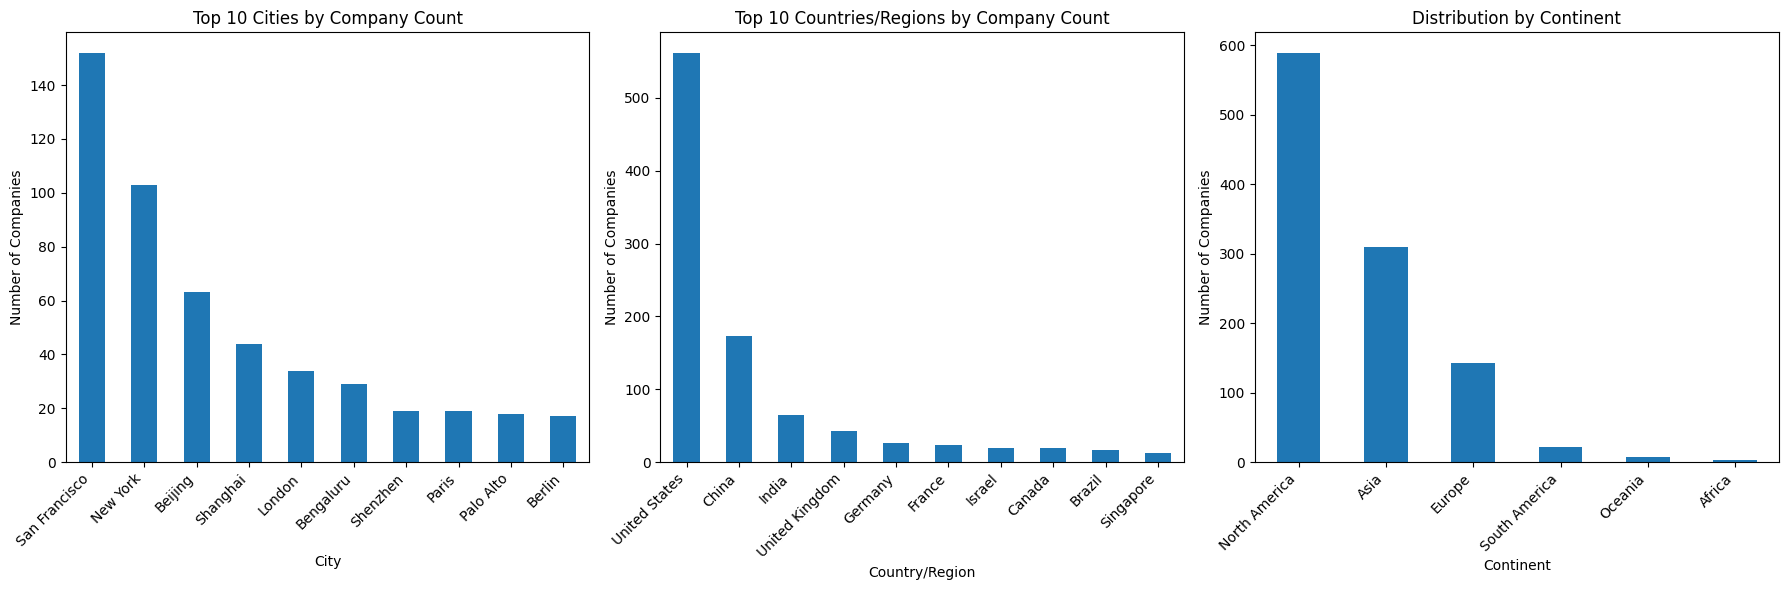

In [71]:
# Analysis of geographical distribution
city_distribution = companies['City'].value_counts()
country_distribution = companies['Country/Region'].value_counts()
continent_distribution = companies['Continent'].value_counts()

# Display distribution by city
print("Distribution by city:\n", city_distribution)

# Display distribution by country
print("\nDistribution by country/region:\n", country_distribution)

# Display distribution by continent
print("\nDistribution by continent:\n", continent_distribution)

# Creating bar charts for geographical distributions
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
city_distribution.head(10).plot(kind='bar')
plt.title('Top 10 Cities by Company Count')
plt.xlabel('City')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, horizontalalignment='right')


plt.subplot(1, 3, 2)
country_distribution.head(10).plot(kind='bar')
plt.title('Top 10 Countries/Regions by Company Count')
plt.xlabel('Country/Region')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, horizontalalignment='right')


plt.subplot(1, 3, 3)
continent_distribution.plot(kind='bar')
plt.title('Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, horizontalalignment='right')


plt.tight_layout()
plt.show()


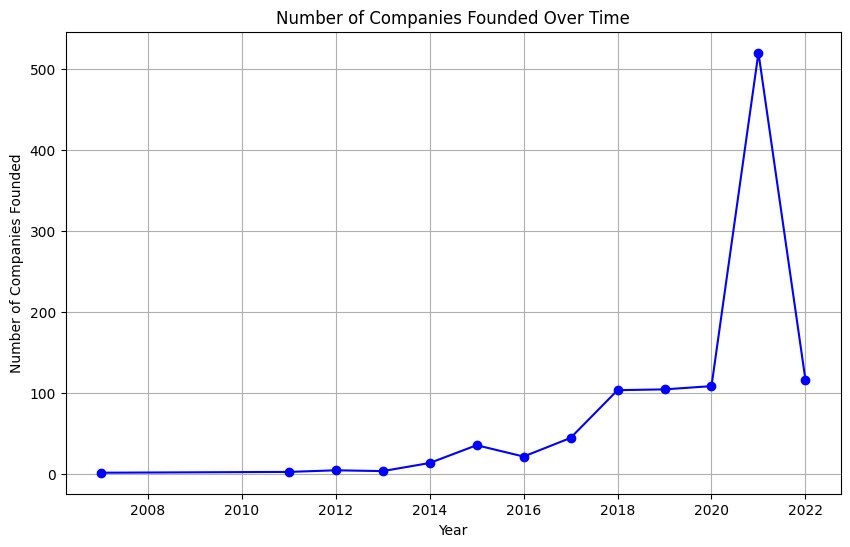

In [59]:
# Extracting year of fundation from inscription date
companies['Year Founded'] = pd.to_datetime(companies['Date Joined']).dt.year

# Calculatin the number of company funded every year 
companies_by_year = companies['Year Founded'].value_counts().sort_index()

# Linechart
plt.figure(figsize=(10, 6))
plt.plot(companies_by_year.index, companies_by_year.values, marker='o', color='blue')
plt.title('Number of Companies Founded Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Companies Founded')
plt.grid(True)
plt.show()


Top 10 Most Active Investors:
 Select Investors
Accel                          60
Tiger Global Management        53
Andreessen Horowitz            53
Sequoia Capital China          48
Insight Partners               47
Sequoia Capital                47
Lightspeed Venture Partners    34
SoftBank Group                 34
General Catalyst               33
Index Ventures                 32
Name: count, dtype: int64


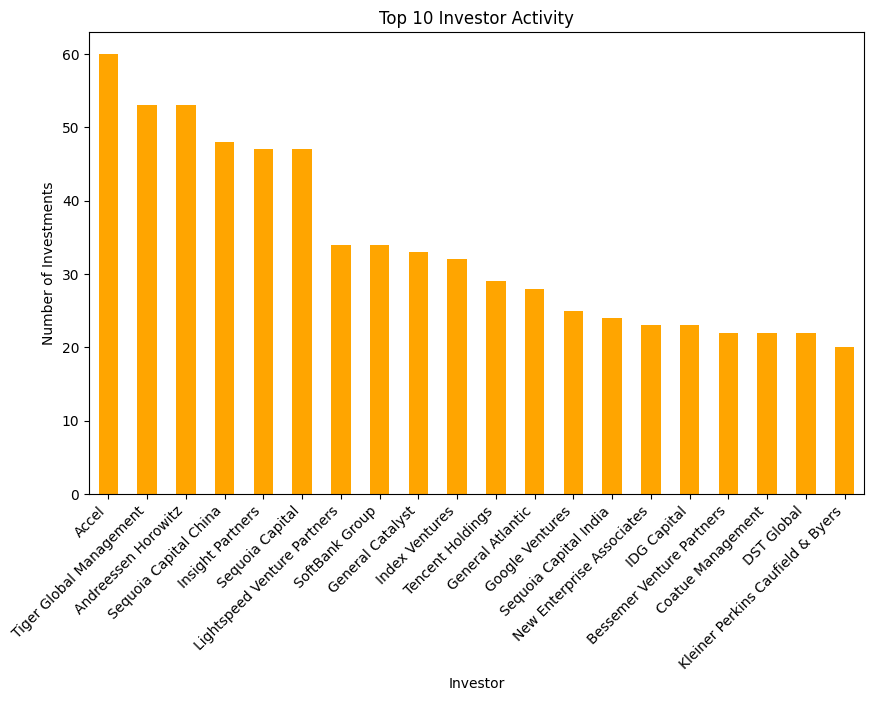

In [75]:
# Calculate the number of investment by investor
investor_activity = companies['Select Investors'].str.split(', ').explode().value_counts()

# Display the first 10 investor
top_investors = investor_activity.head(10)
print("Top 10 Most Active Investors:\n", top_investors)

top_investors = investor_activity.head(20)

# Create barchart
plt.figure(figsize=(10, 6))
top_investors.plot(kind='bar', color='orange')
plt.title('Top 10 Investor Activity')
plt.ylabel('Number of Investments')
plt.xlabel('Investor')
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()
